In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sys

In [3]:
def plot_template(df, reference):
    chrom_l = df[df['reference']==reference]
    
    ticks=[]
    annots=[]
    lengths_dict = {}
    
    figure=None
    figure = plt.figure(figsize=(30, 7), facecolor='w')
    ax = figure.add_subplot(111)
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("left")
    ax.set_ylabel(r'$-{log}_{10}(p)$', weight="bold")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    count=0
    xmin = 0
    for index, row in chrom_l.iterrows():
        count += 1
        chrom = row['chr']
        length = row['end']
        lengths_dict[chrom] = xmin
        xmax=xmin+length
        if (count+1) % 2 == 0:
            ax.axvspan(xmin=xmin, xmax=xmax, color="#E5E5E5")
        else:
            ax.axvspan(xmin=xmin, xmax=xmax, color="#c5c5c5")
        ticks.append((xmin + xmax) / 2)
        annots.append(chrom[:5])
        xmin=xmax
    tot_len = xmax
    return ticks, annots, lengths_dict, ax, tot_len

In [4]:
def plot_gwas(data, reference, y_lim, phenotype):
    y_l = 1
    y_u = y_lim
    dot_norm = 100
    padding=100000000
    axfont = 15
    threshold = 9.3
    ticks, annots, lengths_dict, ax, tot_len = plot_template(chrom_l, reference)

    ax1 = ax.twinx()
    ax1.xaxis.set_ticks_position("none")
    ax1.yaxis.set_ticks_position("left")
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

    data['x'] = data.apply(lambda row: lengths_dict[row['chromosome']]+row['end'], axis=1)
    ax1.scatter(data['x'][data['correlation']>=0], data['association'][data['correlation']>=0], marker='o',c='tab:blue')
    ax1.scatter(data['x'][data['correlation']<0], data['association'][data['correlation']<0], marker='o',c='darkmagenta')

    ax.set_xticks(ticks)
    ax.set_xticklabels(annots)
    ax.set_ylim([y_l,y_u])
    ax1.set_ylim([y_l,y_u])
    ax.set_xlim([-padding,tot_len])
    ax1.set_xlim([-padding,tot_len])

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(axfont)

    for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
                 ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(axfont)

    ax1.axhline(y=threshold, color='black', linestyle='--')
    plt.title(f'reference: {reference}, trait: {phenotype}', fontsize=25,fontweight="bold")
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5, axis='both')
    plt.show()

# Single reference

In [6]:
phenotype='Fe'
reference='chinese'
mc=3
dmp='low_dmp'
path=f'/Volumes/quirozj/09_watseq/03_haplotypes/hapGWAS/01_results/{phenotype}/'
data = pd.read_csv(path+f'whole_genome_genome_{reference}_{phenotype}_{dmp}_gwas_{mc}.tsv', sep = "\t")
chrom_l = pd.read_csv(f'chr_lenghts.tsv', sep = "\t")

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/quirozj/09_watseq/03_haplotypes/hapGWAS/01_results/Fe/whole_genome_genome_chinese_Fe_low_dmp_gwas_3.tsv'

# Compile references GWAS


In [6]:
references =[
"arinalrfor",
"chinese",
"jagger",
"julius",
"lancer",
"landmark",
"mace",
"norin61",
"spelta",
"stanley",
"sy_mattis",
]
def compile_references(reference, phenotype, mc):
    dfs=[]
    for reference in references:
        data = pd.read_csv(path+f'whole_genome_genome_{reference}_{phenotype}_{dmp}_gwas_{mc}.tsv', sep = "\t")
        dfs.append(data)
    dfs_compiled = pd.concat(dfs, axis=0)
    return dfs_compiled
    
compiled_df = compile_references(reference, phenotype, mc)
compiled_df

,chromosome,start,end,haplotype,association,correlation,count
0,chr1A__ari,34000001,35000000,chr1A__ari_35000006,1.18,0.21,1
1,chr1A__ari,35000001,36000000,chr1A__ari_36000005,2.10,0.23,1
2,chr1A__ari,36000001,37000000,chr1A__ari_37000003,1.18,0.21,1
3,chr1A__ari,49000001,50000000,chr1A__ari_50000015,1.28,-0.21,1
4,chr1A__ari,84000001,85000000,chr1A__ari_85000009,2.62,0.22,1
...,...,...,...,...,...,...,...
339,chr7D__sym,1,1000000,chr7D__sym_1000001,1.77,-0.21,1
340,chr7D__sym,8000001,9000000,chr7D__sym_9000006,1.66,-0.21,1
341,chr7D__sym,94000001,95000000,chr7D__sym_95000042,5.18,0.24,1
342,chr7D__sym,485000001,486000000,chr7D__sym_486000030,3.61,-0.22,1


In [19]:
# redirect jupyther output
import sys
old_stdout = sys.stdout
sys.stdout = compiled_df.to_csv(path+f'compiled_references_{phenotype}_gwas_dmp_mc_{mc}.tsv', sep='\t', index=False)
sys.stdout = old_stdout

# All references

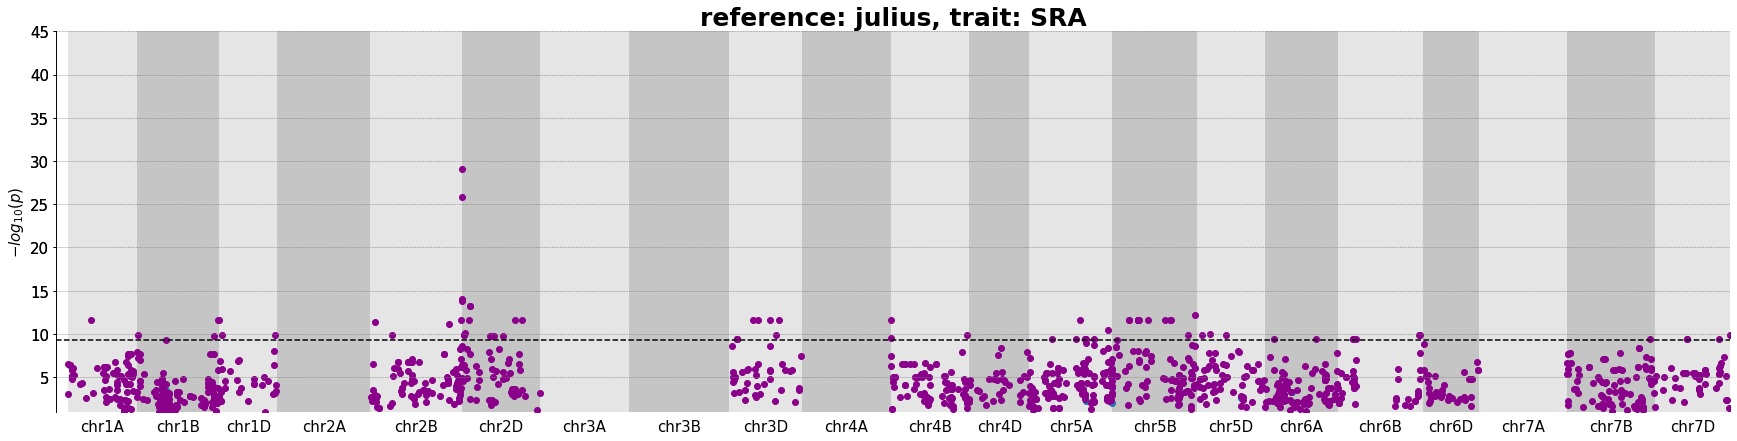

In [11]:
phenotype='SRA'
dmp='slid_dmp'
mc=3
chrom_l = pd.read_csv(f'chr_lenghts.tsv', sep = "\t")
path=f'/Volumes/quirozj/09_watseq/03_haplotypes/hapGWAS/01_results/{phenotype}/'
references =[
# "arinalrfor",
"julius",
# "jagger",
# "julius",
# "lancer",
# "landmark",
# "mace",
# "norin61",
# "spelta",
# "stanley",
# "sy_mattis",
]
for reference in references:
    data = pd.read_csv(path+f'whole_genome_{reference}_{phenotype}_{dmp}_gwas_{mc}.tsv', sep = "\t")
    plot_gwas(data, reference, 45, phenotype)